In [4]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [5]:
theta_list=np.arange(-np.pi, np.pi,0.1)
omega_list=np.arange(0, 5,0.1)

rewards = np.ones((len(theta_list),len(omega_list)))

In [6]:
def compute_reward(self, states):
        abs_q=abs(states[0])
        abs_dq=abs(states[1])

        # reward
        r = lambda q_, dq_: -(q_**2 + 0.01*dq_**2)
        if abs_q<pi*2/3:
            reward= r(abs_q,abs_dq)
        else:
            reward= r(pi*2/3,4)-1.0*(4.0-abs_dq)**2

        return reward

In [7]:
@dataclass
class Data:
    th = None
    omega = None
    u = None


In [8]:

def plot_rewards(rewards, theta_list, omega_list):
    format_values = lambda lst: [f'{x:.2f}' for x in lst]
    plt.figure(figsize=(20,10))
    y_inc=2
    x_inc=4
    _ = plt.imshow(rewards)
    _ = plt.xticks([*range(len(omega_list))][::x_inc],format_values(omega_list)[::x_inc])
    _ = plt.yticks([*range(len(theta_list))][::y_inc],format_values(theta_list)[::y_inc])
    _ = plt.colorbar()
    _ = plt.xlabel('Omega [rad/s]')
    _ = plt.ylabel('Theta [rad]')

In [29]:
def normalise_angle(theta):
    return ((theta)%(2*np.pi))-np.pi

def compute_reward(self):
    q=normalise_angle(self.th)
    if abs(q)<np.pi/3:
        return 500 - 10*self.omega**2 +(self.u/self.omega)**2
    else:
        return q**2+20*self.omega**2+self.u**2 # +10*(self.u/self.omega)**2

C:\Users\Leo\AppData\Local\Temp\ipykernel_2340\419831266.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  return 500 - 10*self.omega**2 +(self.u/self.omega)**2


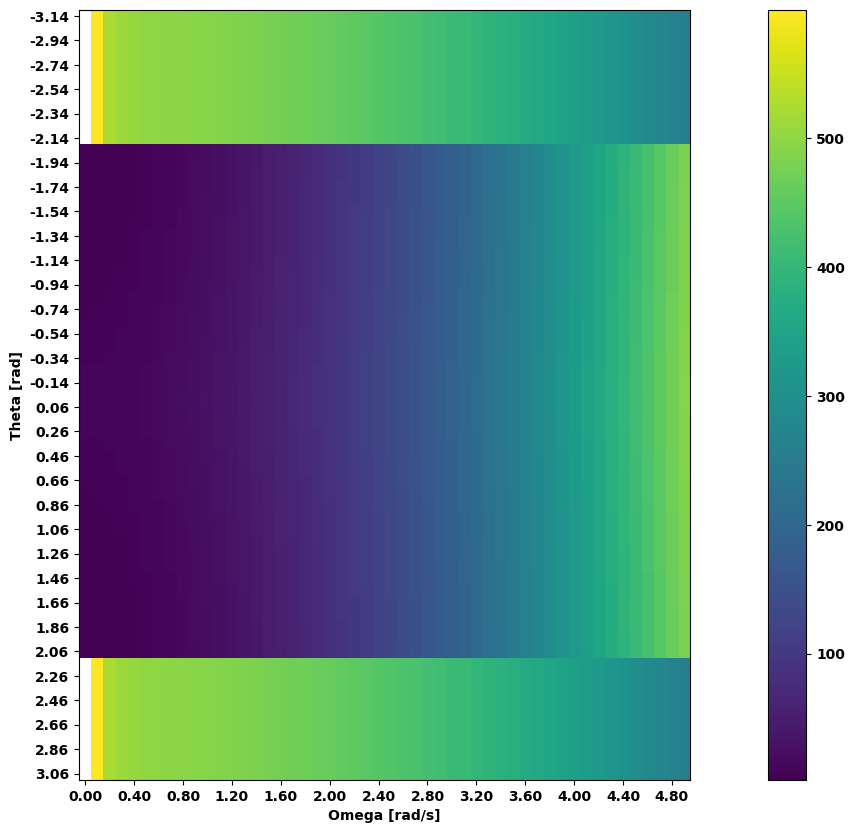

In [30]:
target_angle=np.pi
reward_fun=lambda self: -((np.cos(self.th/2))**2  + 0.1 * self.omega**2 + 0.001 * self.u**2)
# reward_fun=lambda self:  np.cos(self.th)*self.omega**2
angle_reward = lambda self: ((np.cos(self.th-target_angle)+1.5)**2 - 0.25)
correctVelocity_reward = lambda self: 0.00125*(((np.cos(self.th)+1)/2)*(self.omega)**2)
voltage_penalty = lambda self: -0.01*((self.u)**2)
reward_fun = lambda self: angle_reward(self) + correctVelocity_reward(self) + voltage_penalty(self)
reward_fun = lambda self: compute_reward(self)
for i in range(rewards.shape[0]):
    for j in range(rewards.shape[1]):
        data=Data()
        data.th, data.omega=theta_list[i], omega_list[j]
        data.u=1
        rewards[i,j] = reward_fun(data)

plot_rewards(rewards, theta_list, omega_list)